## Assignment template 3) Air quality and data analysis

This assignment follows on from 'Practical 7 - Pandas and statistics'. The data for this exercise has been taken from the following repository:

 - The Harvard Dataverse: https://dataverse.harvard.edu
 - Wang, Hongwei, 2019, "Air pollution and meteorological data in Beijing 2017-2018", https://doi.org/10.7910/DVN/USXCAK, Harvard Dataverse, V1
 - URL: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/USXCAK
 
The main objective is:

<div class="alert alert-block alert-success">
<b> Create a heatmap of correlation coefficients between PM2.5 [Particulate Matter] for 5 air quality stations and a boxplot of average PM2.5 at those stations <a name="Exercise4"></a>  </b> 
    
Overview: You are tasked with trying to resolve correlations between PM2.5 across 5 different sites in Beijing. These sites are selected as:

 - Nansanhuan
 - Yizhuang
 - Yongdingmennei
 - Qianmen
 - Beibuxinqu

Based on the example given in class, we can break this exercise down into a number of steps:

 - Creating a new dataframe for each station ID and ONLY the PM2.5 columns
 - Renaming the columns with PM2.5 data. Why is this?
 - Using UTC time as the common index in all dataframes
 - Merging dataframes into a new one
 - Generating a correlation coefficient matrix from this new dataframe
 - Producing a heatmap and boxplot
 
<div class="alert alert-block alert-warning">
<b>Please note:</b> For renaming a column in a dataframe, you can use the function .rename as per the following demonstration for data from nansanhuan:

```python
nansanhuan_aq_df=nansanhuan_aq_df.rename(columns={"PM2.5": "PM2.5_nansanhuan"})
```

You will need to load the data we have originally used in 'Practical 7 - Pandas and statistics' which can be found in the 'data' folder.

We will discuss this in class, but aside from a working notebook we are also looking for the following:

 - An associated narrative with each operation, 
 - Comments in the code boxes using the # symbol
 - A brief summary of results
 - A list of any references used
   
Also please note that to add another code or markdown box, you can simple use the 'Insert' option on the main menu.
  
</div>

</div>

In [120]:
#Importing pandas and the data

import pandas as pd
data = pd.read_csv("data/beijing_17_18_aq.csv")

In [121]:
#Creating a variable to hold all the data for the Nansanhuan data

data_nan= data[data['stationId'] == 'nansanhuan_aq']

data_nan.head() 

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
151062,nansanhuan_aq,01/01/2017 14:00,431.0,467.0,147.0,6.5,3.0,14.0
151063,nansanhuan_aq,01/01/2017 15:00,426.0,444.0,144.0,6.7,3.0,13.0
151064,nansanhuan_aq,01/01/2017 16:00,420.0,451.0,136.0,0.7,3.0,13.0
151065,nansanhuan_aq,01/01/2017 17:00,417.0,446.0,128.0,7.4,3.0,13.0
151066,nansanhuan_aq,01/01/2017 18:00,426.0,465.0,124.0,0.8,3.0,12.0


In [122]:
#Renaming the columns so the dataframes can be merged later
data_nan=data_nan.rename(columns={"PM2.5": "PM2.5_nansanhuan"})

#The only columns we need are the station name, the time, and the PM2.5 values
data_nan = data_nan[['utc_time', 'PM2.5_nansanhuan']]

data_nan.head()

,utc_time,PM2.5_nansanhuan
151062,01/01/2017 14:00,431.0
151063,01/01/2017 15:00,426.0
151064,01/01/2017 16:00,420.0
151065,01/01/2017 17:00,417.0
151066,01/01/2017 18:00,426.0


In [123]:
#Setting index to UTC time

data_nan=data_nan.set_index('utc_time')

In [124]:
data_nan.head()

,PM2.5_nansanhuan
utc_time,
01/01/2017 14:00,431.0
01/01/2017 15:00,426.0
01/01/2017 16:00,420.0
01/01/2017 17:00,417.0
01/01/2017 18:00,426.0


In [125]:
data_yiz = data[data['stationId'] == 'yizhuang_aq']
data_yiz=data_yiz.rename(columns={"PM2.5": "PM2.5_yizhuang"})
data_yiz = data_yiz[['utc_time', 'PM2.5_yizhuang']]
data_yiz = data_yiz.set_index('utc_time')

In [126]:
data_yong= data[data['stationId'] == 'yongdingmennei_aq']
data_yong=data_yong.rename(columns={"PM2.5": "PM2.5_yongdingmennei"})
data_yong= data_yong[['utc_time', 'PM2.5_yongdingmennei']]
data_yong=data_yong.set_index('utc_time')

In [127]:
data_qia=data[data['stationId'] == 'qianmen_aq']
data_qia=data_qia.rename(columns={"PM2.5": "PM2.5_qianmen"})
data_qia=data_qia[['utc_time', 'PM2.5_qianmen']]
data_qia=data_qia.set_index('utc_time')

In [128]:
data_beib=data[data['stationId'] == 'beibuxinqu_aq']
data_beib=data_beib.rename(columns={"PM2.5": "PM2.5_beibuxinqu"})
data_beib=data_beib[['utc_time', 'PM2.5_beibuxinqu']]
data_beib=data_beib.set_index('utc_time')

In [129]:
combined_df=pd.merge(pd.merge(pd.merge(pd.merge(data_nan,data_yiz,on='utc_time'),data_yong,on='utc_time'),data_qia,on='utc_time'),data_beib,on='utc_time')

combined_df.head()

,PM2.5_nansanhuan,PM2.5_yizhuang,PM2.5_yongdingmennei,PM2.5_qianmen,PM2.5_beibuxinqu
utc_time,,,,,
01/01/2017 14:00,431.0,278.0,415.0,436.0,479.0
01/01/2017 15:00,426.0,298.0,409.0,443.0,481.0
01/01/2017 16:00,420.0,306.0,401.0,429.0,488.0
01/01/2017 17:00,417.0,306.0,407.0,448.0,487.0
01/01/2017 18:00,426.0,315.0,415.0,452.0,489.0


In [130]:
corr = combined_df[['PM2.5_nansanhuan','PM2.5_yizhuang','PM2.5_yongdingmennei','PM2.5_qianmen','PM2.5_beibuxinqu']].corr()

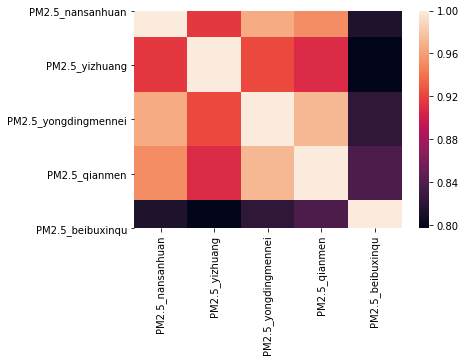

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

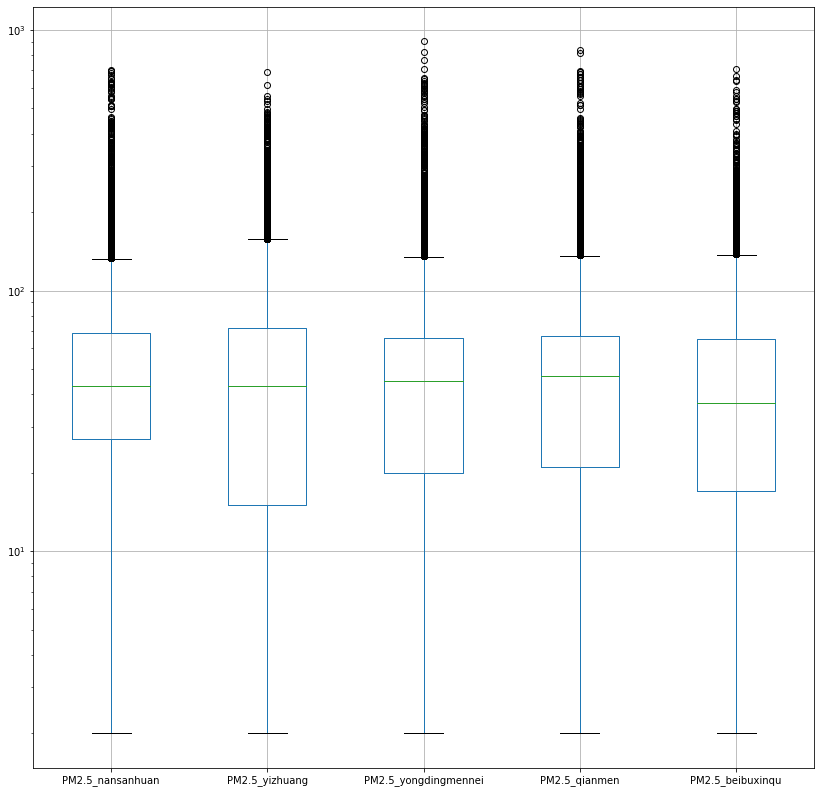

In [132]:
combined_df[['PM2.5_nansanhuan','PM2.5_yizhuang','PM2.5_yongdingmennei','PM2.5_qianmen','PM2.5_beibuxinqu']].boxplot(column=['PM2.5_nansanhuan','PM2.5_yizhuang','PM2.5_yongdingmennei','PM2.5_qianmen','PM2.5_beibuxinqu'],figsize=(14,14)).set_yscale('log')

In [119]:
# References
# https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
# https://seaborn.pydata.org/generated/seaborn.heatmap.html